In [6]:
from fastai.vision.all import *
from matplotlib import patches

In [7]:
path = untar_data("https://github.com/OlafenwaMoses/FireNET/releases/download/v1.0/fire-dataset.zip")

In [8]:
list(path.iterdir())

[Path('/home/kavindu99/.fastai/data/fire-dataset/train'),
 Path('/home/kavindu99/.fastai/data/fire-dataset/validation')]

In [9]:
path.ls()

(#2) [Path('/home/kavindu99/.fastai/data/fire-dataset/train'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation')]

In [10]:
train_path = path/'train'

In [11]:
val_path = path/'validation'

In [12]:
train_path.ls()

(#2) [Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images')]

In [13]:
val_path.ls()

(#2) [Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images')]

In [14]:
train_ann_paths = train_path/'annotations'
train_img_paths = train_path/'images'

In [15]:
val_ann_paths = val_path/'annotations'
val_img_paths = val_path/'images'

In [16]:
train_img_paths.ls()

(#412) [Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/img (83).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/img (113).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/img (38).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/small (70).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/pic (162).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/pic (125).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/img (140).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/pic (43).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/small (94).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/images/pic (148).jpg')...]

In [17]:
val_img_paths.ls()

(#90) [Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/small (7).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/small (4).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/pic (5).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/img (14).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/img (12).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/small (22).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/img (26).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/pic (13).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/img (4).jpg'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/images/small (6).jpg')...]

In [18]:
train_ann_paths.ls()

(#412) [Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/small (123).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/img (104).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/small (74).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/pic (70).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/img (42).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/small (96).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/small (75).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/small (80).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/small (137).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/train/annotations/pic (137).xml')...]

In [19]:
val_ann_paths.ls()

(#90) [Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/img (8).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/pic (11).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/img (25).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/img (19).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/pic (10).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/small (19).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/small (13).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/small (15).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/img (15).xml'),Path('/home/kavindu99/.fastai/data/fire-dataset/validation/annotations/img (12).xml')...]

In [20]:
import xml.etree.ElementTree as ET

In [21]:
def get_anns(file_path):
    file = open(file_path)
    tree = ET.parse(file)
    root = tree.getroot()
    img = root[1].text
    bboxs = [int(root[6][4][1].text), int(root[6][4][0].text), int(root[6][4][3].text), int(root[6][4][2].text)]
    return img,bboxs

In [22]:
a, b = get_anns(train_ann_paths.ls()[0])
a, b

('small (123).jpg', [30, 91, 119, 129])

In [23]:
c, d = get_anns(val_ann_paths.ls()[0])
c, d

('img (8).jpg', [69, 113, 127, 181])

In [24]:
train_imgs, train_bboxs = [get_anns(path)[0] for path in train_ann_paths.ls()], [get_anns(path)[1] for path in train_ann_paths.ls()]

In [25]:
train_imgs[0], train_bboxs[0]

('small (123).jpg', [30, 91, 119, 129])

In [26]:
val_imgs, val_bboxs = [get_anns(path)[0] for path in val_ann_paths.ls()], [get_anns(path)[1] for path in val_ann_paths.ls()]

In [27]:
val_imgs[0], val_bboxs[0]

('img (8).jpg', [69, 113, 127, 181])

In [28]:
train_anns = collections.defaultdict(lambda:[])

for img, bbox in zip(train_imgs,train_bboxs):
    train_anns[img].append(bbox)
len(train_anns)

412

In [29]:
val_anns = collections.defaultdict(lambda:[])

for img, bbox in zip(val_imgs,val_bboxs):
    val_anns[img].append(bbox)
len(val_anns)

90

In [30]:
im = Image.open(train_img_paths/train_imgs[0])
im2 = Image.open(val_img_paths/val_imgs[0])

In [31]:
def bb_hw(b):
    return np.array([b[1], b[0], b[2]-b[0], b[3], b[1]])

In [32]:
def show_img(img, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [33]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(linewidth=lw, foreground='black'), 
                        patheffects.Normal()])

In [34]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))

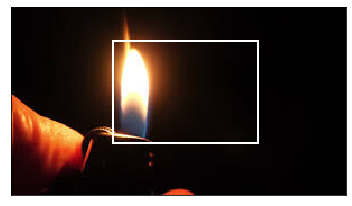

In [35]:
ax = show_img(im)
b = bb_hw(train_bboxs[0])
draw_rect(ax, b)

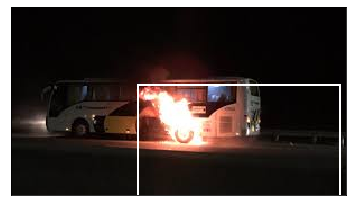

In [36]:
ax = show_img(im2)
b = bb_hw(val_bboxs[0])
draw_rect(ax, b)

In [37]:
def draw_img(im, ann):
    ax = show_img(im, figsize=(16,8))
    b = bb_hw(ann)
    draw_rect(ax, b)

In [44]:
getters = [lambda o: train_img_paths/o, lambda o: train_anns[o][0]]

In [45]:
item_tfms = [Resize(224, method='squish')]
#batch_tfms = [ToTensor()]

In [46]:
db = DataBlock(blocks=(ImageBlock, BBoxBlock),
                 splitter=RandomSplitter(),
                 getters=getters,
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [47]:
db.summary(train_imgs)

Setting-up type transforms pipelines
Found 412 items
2 datasets of sizes 330,82
Setting up Pipeline: <lambda> -> PILBase.create
Setting up Pipeline: <lambda> -> TensorBBox.create

Building one sample
  Pipeline: <lambda> -> PILBase.create
    starting from
      small (136).jpg
    applying <lambda> gives
      /home/kavindu99/.fastai/data/fire-dataset/train/images/small (136).jpg
    applying PILBase.create gives
      PILImage mode=RGB size=225x225
  Pipeline: <lambda> -> TensorBBox.create
    starting from
      small (136).jpg
    applying <lambda> gives
      [66, 90, 99, 110]
    applying TensorBBox.create gives
      TensorBBox of size 1x4

Final sample: (PILImage mode=RGB size=225x225, TensorBBox([[ 66.,  90.,  99., 110.]]))


Found 412 items
2 datasets of sizes 330,82
Setting up Pipeline: <lambda> -> PILBase.create
Setting up Pipeline: <lambda> -> TensorBBox.create
Setting up after_item: Pipeline: PointScaler -> Resize -- {'size': (460, 460), 'method': 'crop', 'pad_mode': 'ref

/home/kavindu99/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:146: UserWarning: 
NVIDIA GeForce RTX 3050 Laptop GPU with CUDA capability sm_86 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA GeForce RTX 3050 Laptop GPU GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [214]:
ds = db.datasets(imgs)

In [215]:
ds.train[0]

(PILImage mode=RGB size=275x183, TensorBBox([[ 55.,  48., 143., 169.]]))

In [216]:
dls = ds.dataloaders(imgs, after_item=[Resize(224), ToTensor])

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


ValueError: not enough values to unpack (expected 2, got 0)

In [142]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088, 4))
learn = vision_learner(dls,resnet34, custom_head=head_reg4, loss_func=nn.L1Loss(), 
                       metrics=error_rate)

In [ ]:
learn.summary()

In [ ]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))